In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pylab
import skimage
from skimage import measure
import math

In [57]:
image='/opt/output/dsb200_176_predictions.npy'
im=np.load(image)

In [6]:
total_image=im.shape[0]
print('Total labels:::'+str(total_image))

Total labels:::270


In [58]:
#Looping through all the labels and identifying ones with more than one contour
dict_contour_count={}
for i in range(total_image):
    result = im[i][:, :, 0]
    contours = measure.find_contours(result, 0.1)
    contours_created = skimage.measure.find_contours(result, 0.1)
    dict_contour_count[i]=len(contours_created)

In [59]:
images_with_more= ([i for i in dict_contour_count if dict_contour_count[i] > 1])
print('#of labels with more than 1 contour:::'+str(len(images_with_more)))

#of labels with more than 1 contour:::40


In [48]:
#trying to see if something has more than 3 contours
print([i for i in dict_contour_count if dict_contour_count[i] > 2])

[23, 24]


23


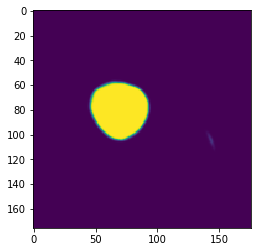

24


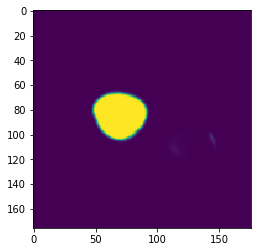

26


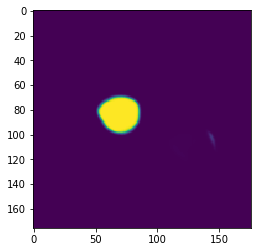

30


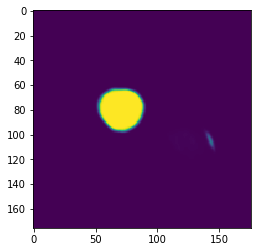

31


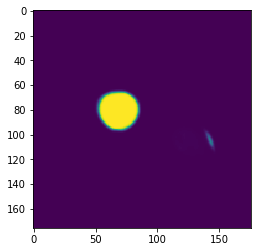

35


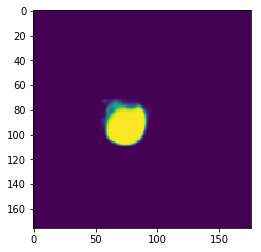

37


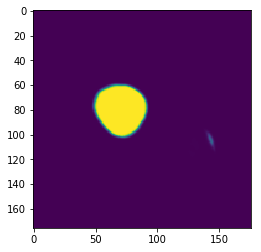

38


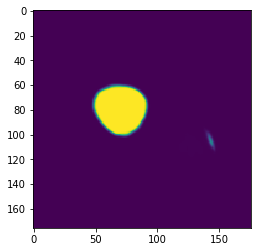

40


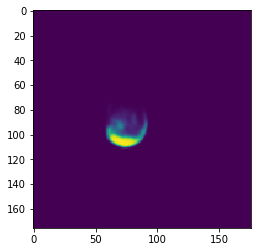

42


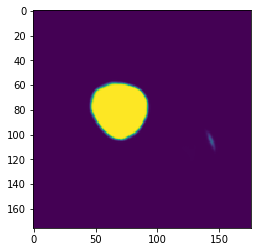

49


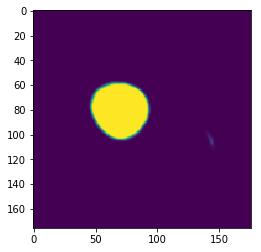

50


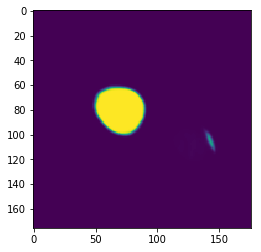

53


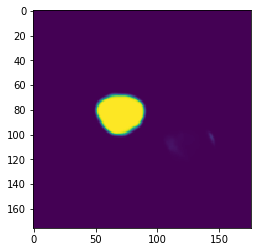

68


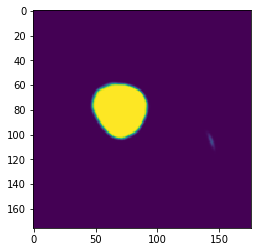

74


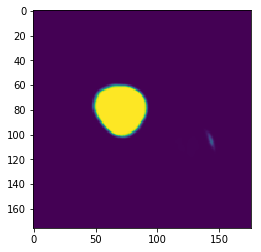

75


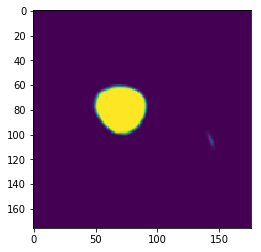

79


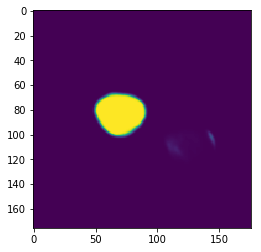

84


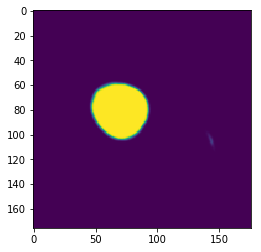

85


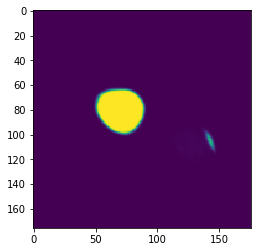

119


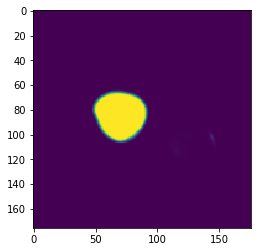

129


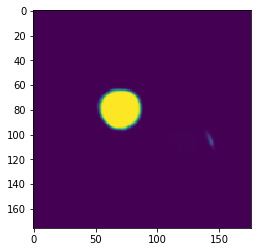

130


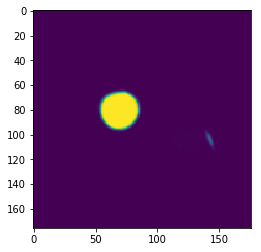

134


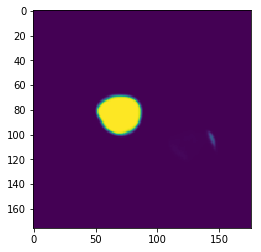

138


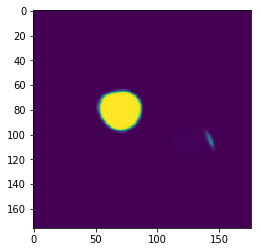

142


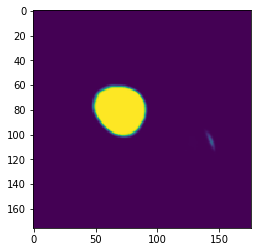

145


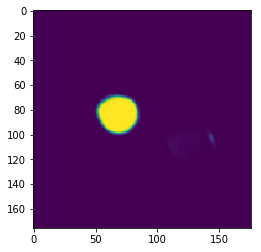

151


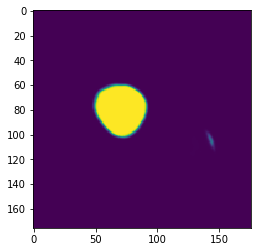

152


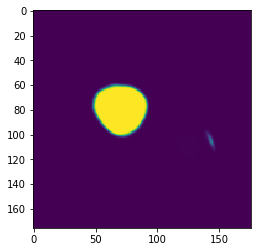

187


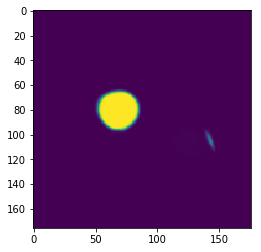

188


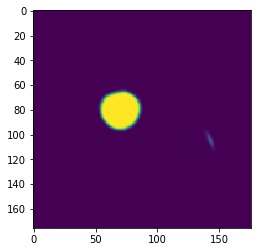

192


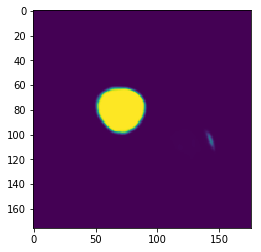

220


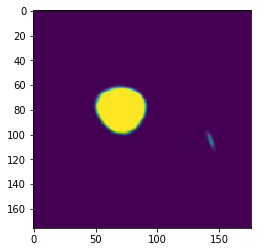

226


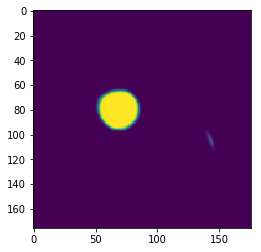

227


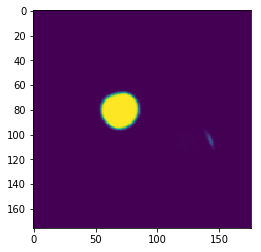

230


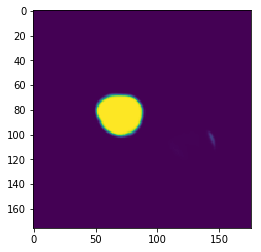

237


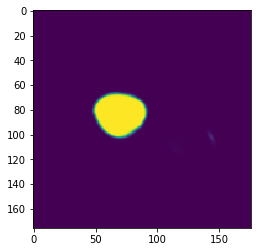

241


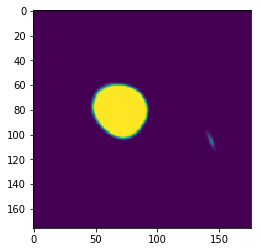

247


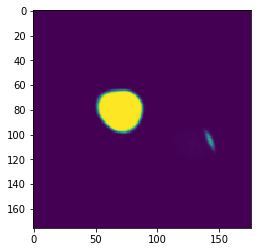

250


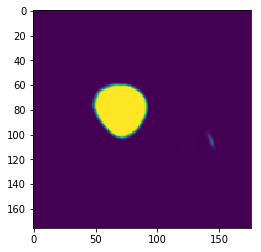

251


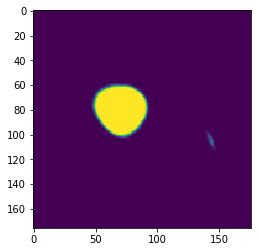

In [9]:
#Verifying the images with more than 1 contour
for i in images_with_more:
    print(i)
    result = im[i][:, :, 0]
    pylab.imshow(result)
    pylab.show()


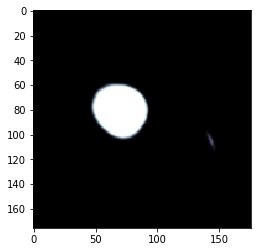

In [11]:
iml=im[241][:, :, 0]
plt.imshow(iml,cmap='bone')

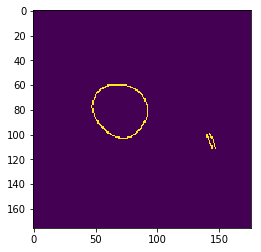

In [12]:
e=canny(iml)
plt.imshow(e)

In [53]:
def clean_contours(image):
    plt.figure(figsize=(10,10))    
    plt.subplot(221),plt.imshow(image,cmap='bone')
    plt.title('orig Image')
    plt.subplot(222),plt.imshow(canny(image),cmap='bone')
    plt.title('orig canny')
    dict_shape={}
    t_im1=image
    cntrs=skimage.measure.find_contours(t_im1,0.1)
    print('# of contours identified:::'+str(len(cntrs)))
    for i in range(len(cntrs)):
        print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
        dict_shape[i]=cntrs[i].shape[0]
    print(dict_shape)
    del dict_shape[max(dict_shape, key=dict_shape.get)]
    print(dict_shape)
    for k in dict_shape:
        print ('deleting contour '+str(k))
        x1=math.trunc(np.min(cntrs[k],axis=0)[0])
        y1=math.trunc(np.min(cntrs[k],axis=0)[1])
        print(x1)
        print(y1)
        x2=math.trunc(np.max(cntrs[k],axis=0)[0])
        y2=math.trunc(np.max(cntrs[k],axis=0)[1])
        print(x2)
        print(y2)
        t_im1[x1:x2+1, y1:y2+1]=0
    plt.subplot(223),plt.imshow(t_im1)
    plt.title('Fixed Image')
    plt.subplot(224),plt.imshow(canny(t_im1))
    plt.title('Fixed canny')    
        

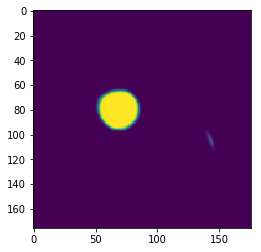

In [37]:
image=im[226][:, :, 0]
plt.imshow(image)

# of contours identified:::2
contour:0  shape[0]:139
contour:1  shape[0]:31
{0: 139, 1: 31}
{1: 31}
deleting contour 1
99
140
109
145


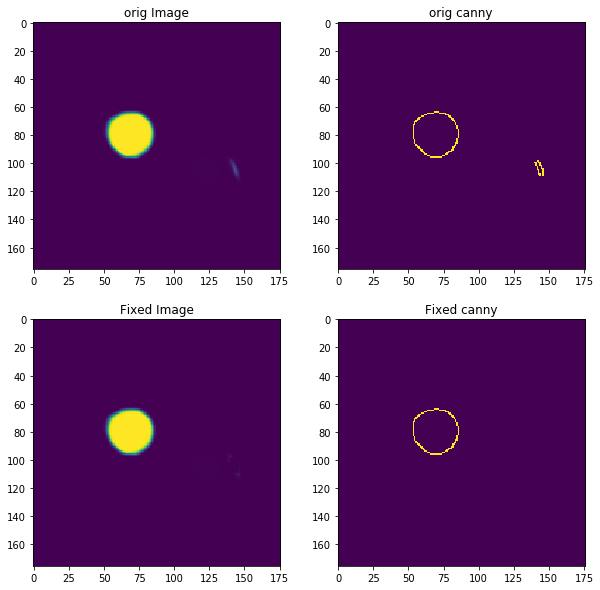

In [38]:
clean_contours(image)

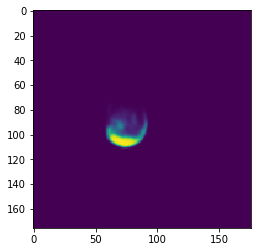

In [40]:
image2=im[40][:,:,0]
plt.imshow(image2)

# of contours identified:::2
contour:0  shape[0]:165
contour:1  shape[0]:11
{0: 165, 1: 11}
{1: 11}
deleting contour 1
94
75
97
77


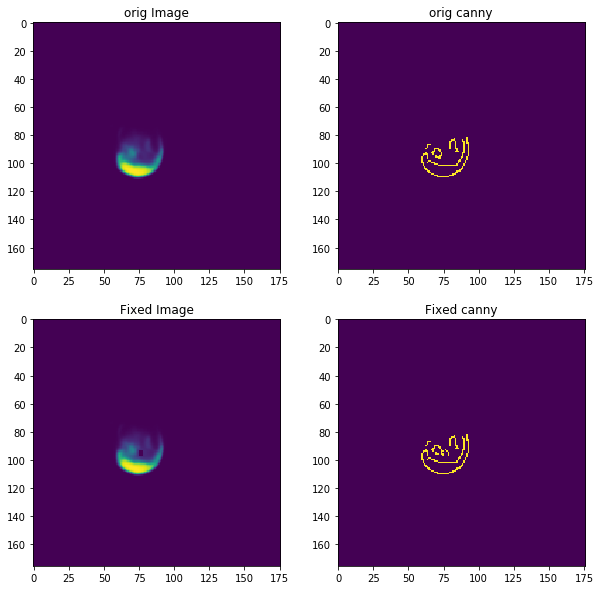

In [41]:
clean_contours(image2)

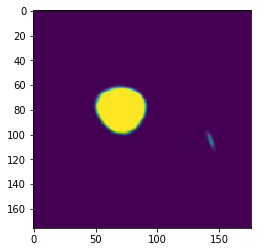

In [60]:
image3=im[220][:,:,0]
plt.imshow(image3)

# of contours identified:::2
contour:0  shape[0]:167
contour:1  shape[0]:41
{0: 167, 1: 41}
{1: 41}
deleting contour 1
98
139
111
146


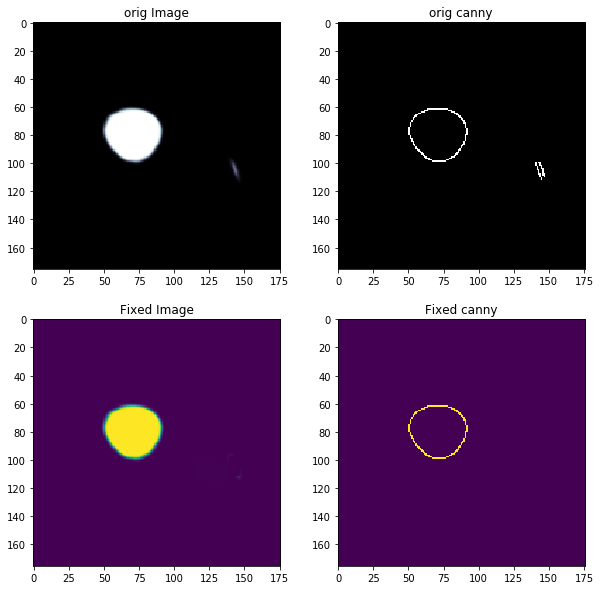

In [61]:
clean_contours(image3)

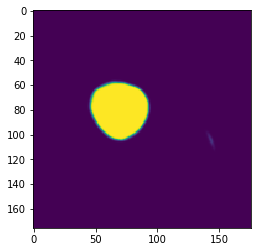

In [49]:
image23=im[23][:,:,0]
plt.imshow(image23)

# of contours identified:::3
contour:0  shape[0]:199
contour:1  shape[0]:5
contour:2  shape[0]:15
{0: 199, 1: 5, 2: 15}
{1: 5, 2: 15}
deleting contour 1
101
141
102
142
deleting contour 2
102
142
107
144


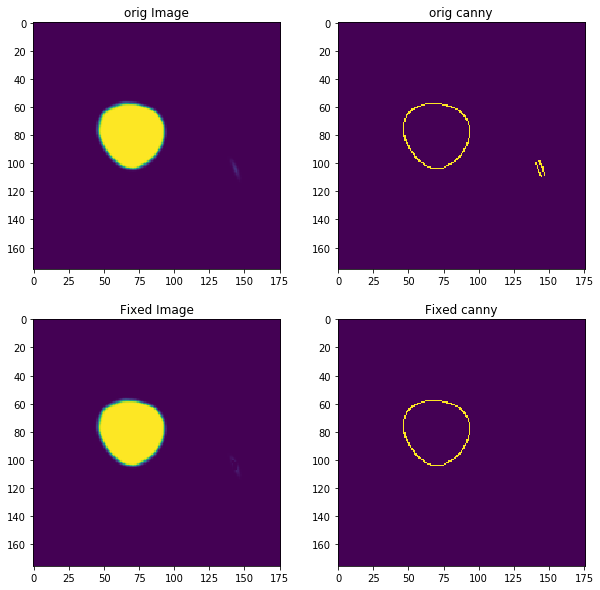

In [50]:
clean_contours(image23)

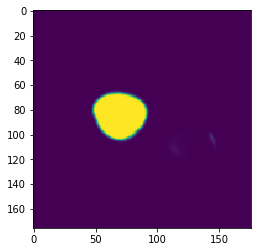

In [62]:
image24=im[24][:,:,0]
plt.imshow(image24)

# of contours identified:::3
contour:0  shape[0]:173
contour:1  shape[0]:7
contour:2  shape[0]:7
{0: 173, 1: 7, 2: 7}
{1: 7, 2: 7}
deleting contour 1
101
143
103
144
deleting contour 2
103
144
105
145


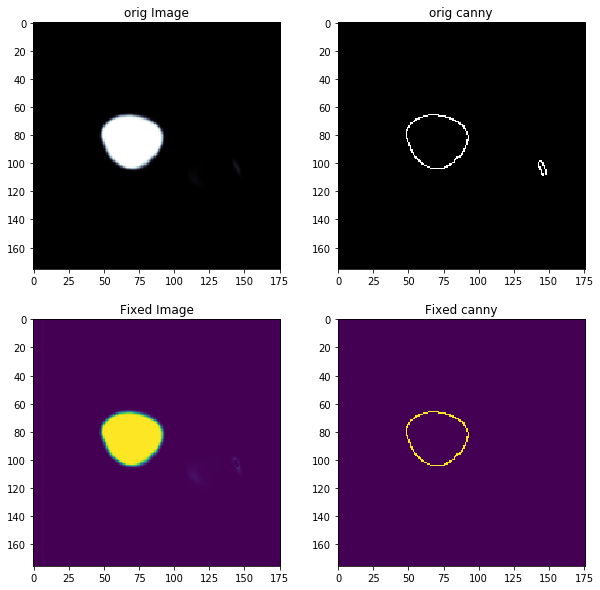

In [63]:
clean_contours(image24)